In [2]:
# import dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# data cleaning

df.drop_duplicates()

# normalise all columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df.head()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0


<AxesSubplot: >

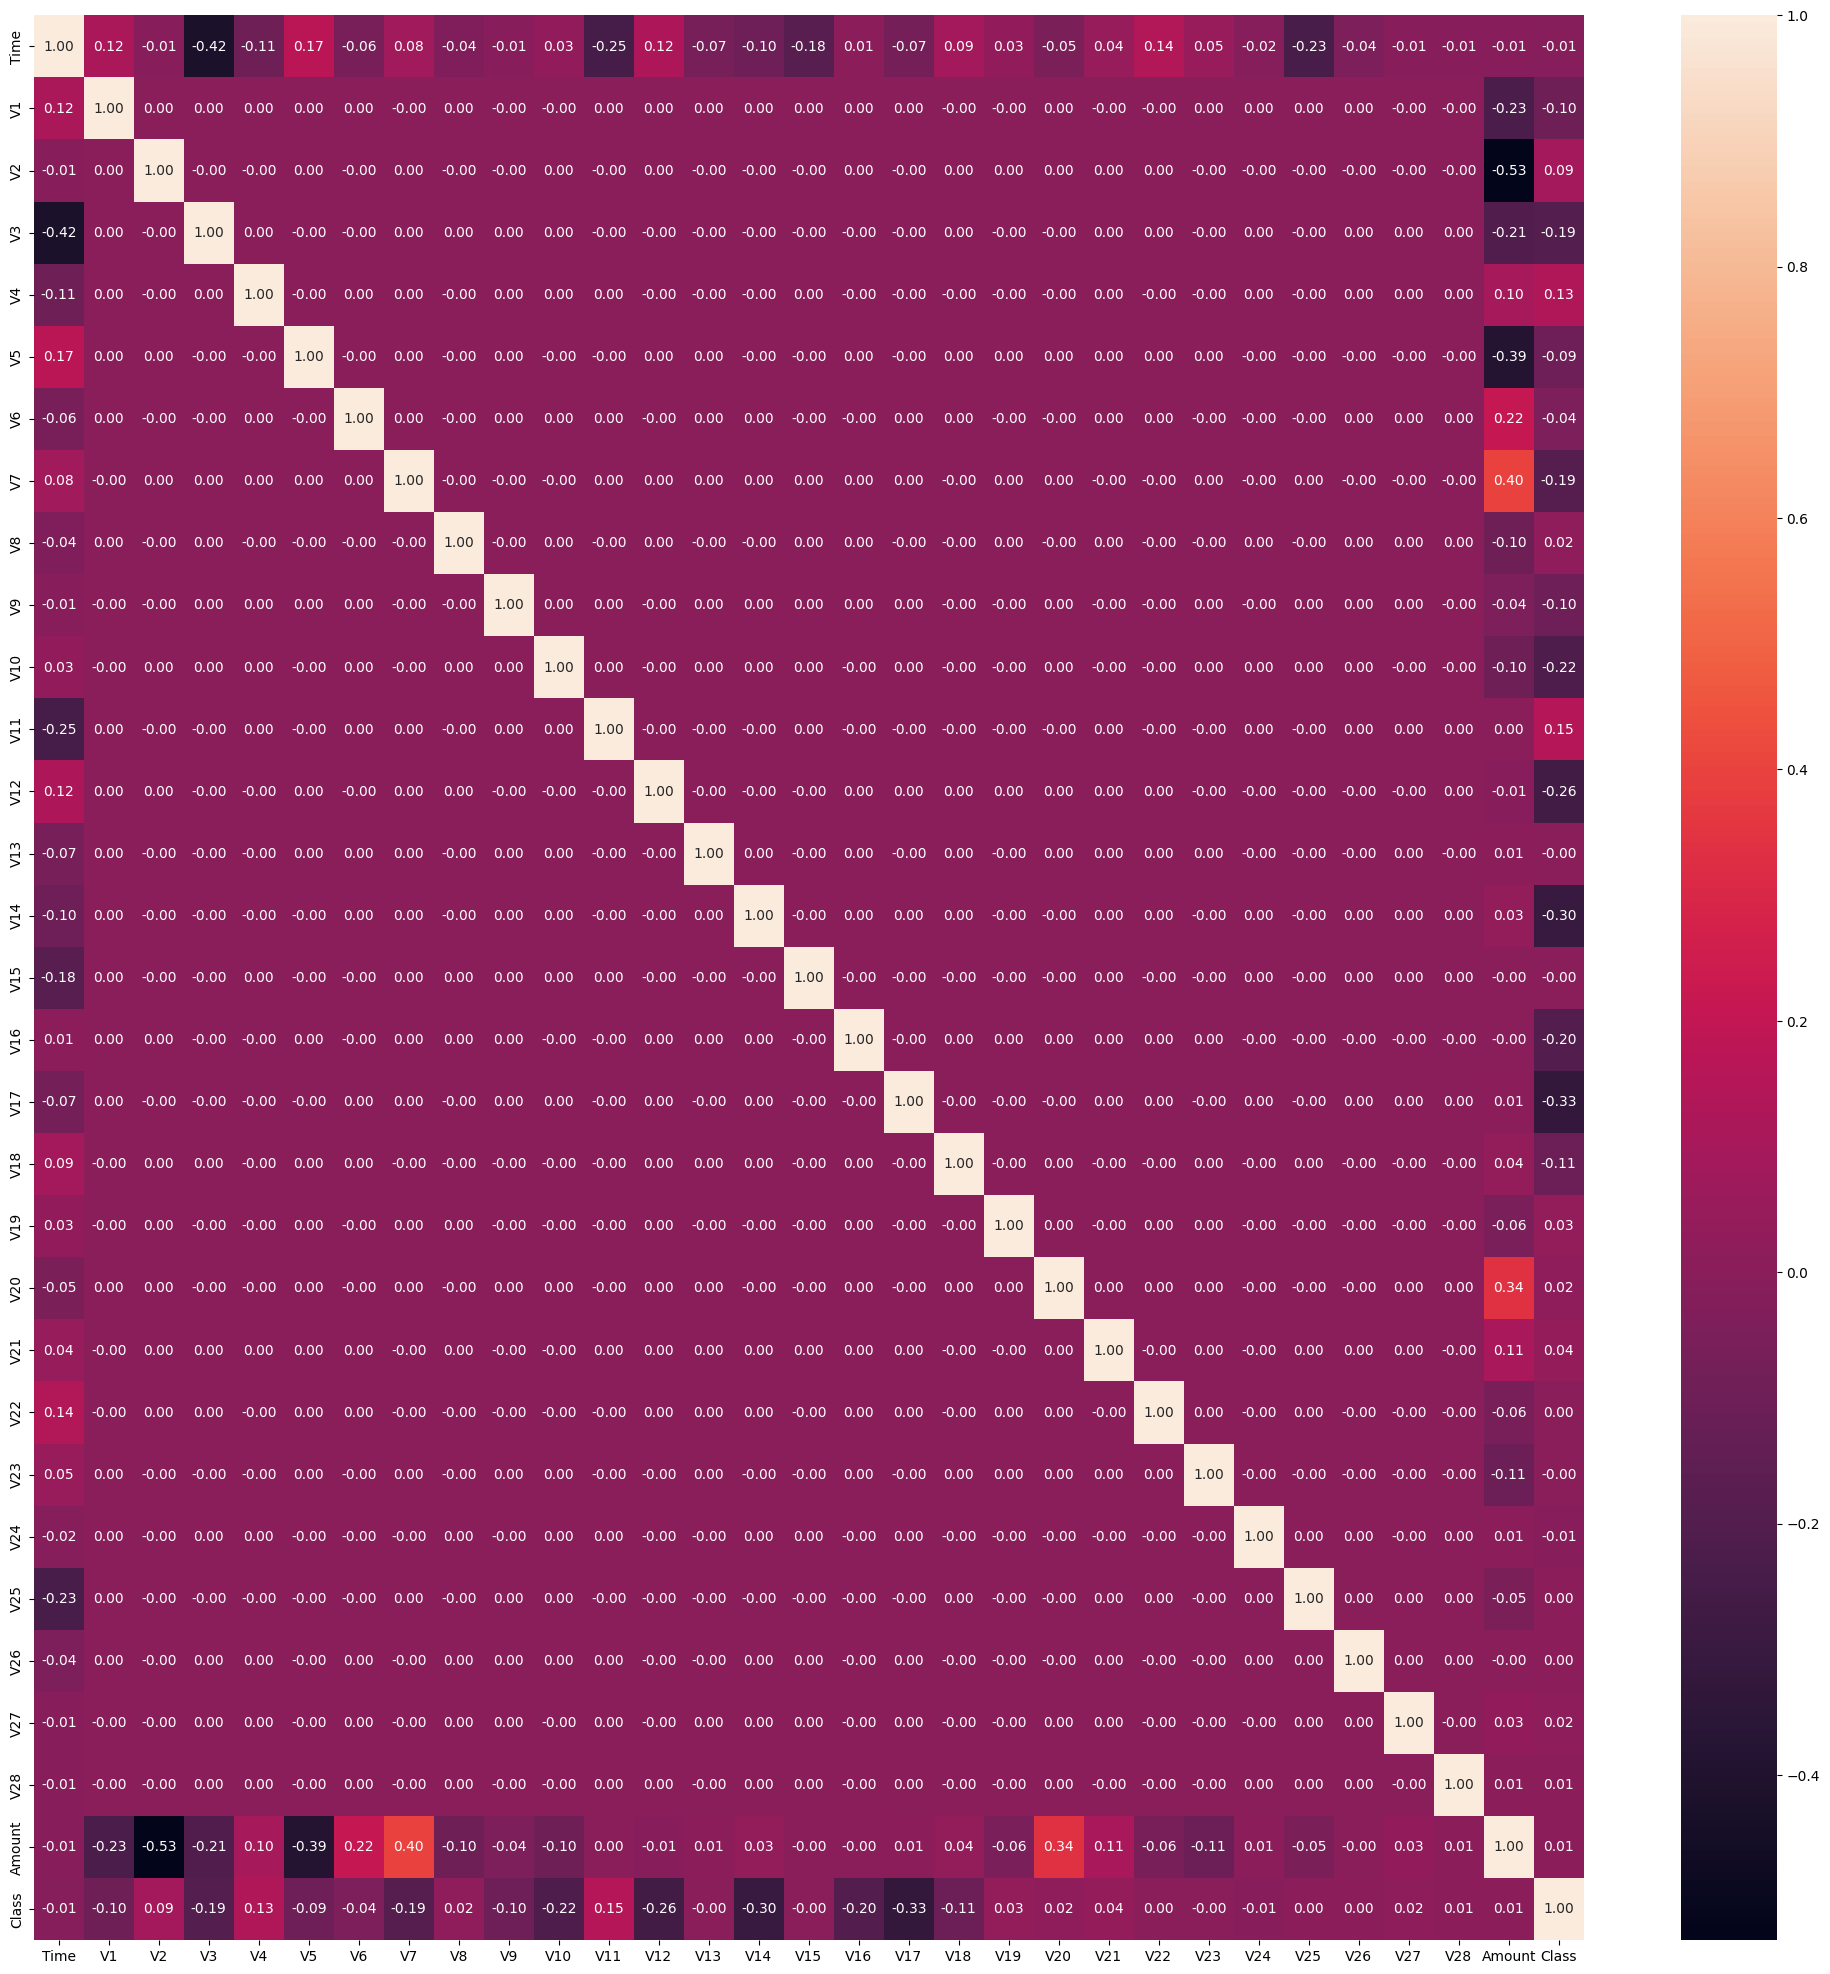

In [4]:
# feature selection

import seaborn as sns
import matplotlib.pyplot as plt
 
# correlation matrix
corr = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, fmt='.2f')            


In [5]:
# calculate recall

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))

Recall: 0.52


In [6]:
# chi square test

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.iloc[:,0:30]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(15,'Score')) 

# fit the top 5 features

df_new = bestfeatures.fit_transform(X,y)

   Specs      Score
11   V11  88.222110
4     V4  79.307556
14   V14  41.919315
12   V12  38.953409
17   V17  25.287263
16   V16  19.011503
18   V18  18.006508
10   V10  13.364745
3     V3   8.742138
9     V9   8.419628
0   Time   5.952875
1     V1   3.380121
19   V19   2.471903
7     V7   2.137646
2     V2   0.939127


In [7]:
# calculate recall on df_new

X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))


Recall: 0.52


In [8]:
# odds ratio

import statsmodels.api as sm
from scipy import stats
import numpy as np

cols = list(df.columns)
cols.remove('Class')
X = df[cols]
y = df['Class']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.003933
         Iterations 16
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.691    
Dependent Variable: Class            AIC:              2300.5649
Date:               2022-12-01 18:08 BIC:              2617.3519
No. Observations:   284807           Log-Likelihood:   -1120.3  
Df Model:           29               LL-Null:          -3621.2  
Df Residuals:       284777           LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     16.0000                                     
-----------------------------------------------------------------
           Coef.    Std.Err.     z     P>|z|    [0.025    0.975] 
-----------------------------------------------------------------
Time       -0.6488    0.3849  -1.6856  0.0919   -1.4032    0.1056
V1          3.0210    2.7194   1.1109  0.2666   -2.3090    8.3510
V2     